In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-data-2020-india/df.csv


In [2]:
data= pd.read_csv('/kaggle/input/road-accident-data-2020-india/df.csv')
data

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [3]:
data.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [4]:
data.tail()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0
9549,Vizaq,Weather,Sunny/Clear,Total Injured,813.0


In [5]:
data.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [7]:
data['Cause category'].unique()

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

In [8]:
data.isnull().sum()    # we find 3 null values in the dataset under count column

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [9]:
data.fillna(0.0, inplace=True)
data                                    #Filling Duplicates with 0 as it is not having any incidents

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [10]:
values=data['Outcome of Incident'].value_counts()
values

Outcome of Incident
Greviously Injured           2000
Minor Injury                 2000
Persons Killed               2000
Total number of Accidents    2000
Total Injured                1550
Name: count, dtype: int64

In [11]:
df=data['Million Plus Cities'].value_counts()
df

Million Plus Cities
Agra                    191
Patna                   191
Kollam                  191
Kota                    191
Lucknow                 191
Ludhiana                191
Madurai                 191
Mallapuram              191
Meerut                  191
Mumbai                  191
Nagpur                  191
Nashik                  191
Pune                    191
Ahmedabad               191
Raipur                  191
Rajkot                  191
Srinagar                191
Surat                   191
Thiruvanthapuram        191
Thrissur                191
Tiruchirapalli          191
Vadodra                 191
Varanasi                191
Vijaywada city          191
Kolkata                 191
Kochi                   191
Khozikode               191
Kanpur                  191
Allahabad(Prayagraj)    191
Amritsar                191
Asansol Durgapur        191
Aurangabad              191
Bengaluru               191
Bhopal                  191
Chandigarh              191


In [12]:
data['Cause category'].value_counts()

Cause category
Road Features               2000
Impacting Vehicle/Object    1800
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64

In [13]:
data.query('`Cause category`=="Traffic Violation"')

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
3000,Agra,Traffic Violation,Driving on Wrong side,Greviously Injured,56.0
3001,Agra,Traffic Violation,Driving on Wrong side,Minor Injury,40.0
3002,Agra,Traffic Violation,Driving on Wrong side,Total number of Accidents,98.0
3003,Agra,Traffic Violation,Driving on Wrong side,Persons Killed,51.0
3004,Agra,Traffic Violation,Driving on Wrong side,Total Injured,96.0
...,...,...,...,...,...
4495,Vizaq,Traffic Violation,Use of Mobile Phone,Greviously Injured,0.0
4496,Vizaq,Traffic Violation,Use of Mobile Phone,Minor Injury,0.0
4497,Vizaq,Traffic Violation,Use of Mobile Phone,Total number of Accidents,0.0
4498,Vizaq,Traffic Violation,Use of Mobile Phone,Persons Killed,0.0


In [14]:
data.sort_values(by= 'Count', ascending= False)

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
5244,Jabalpur,Road Features,Others,Total Injured,3148.0
5242,Jabalpur,Road Features,Others,Total number of Accidents,3134.0
3532,Indore,Traffic Violation,Over,Total number of Accidents,3032.0
8473,Bengaluru,Weather,Sunny/Clear,Total number of Accidents,3014.0
3202,Bengaluru,Traffic Violation,Over,Total number of Accidents,2993.0
...,...,...,...,...,...
4449,Vijaywada city,Traffic Violation,Drunken Driving/ Consumption of alcohol and drug,Total Injured,0.0
4448,Vijaywada city,Traffic Violation,Drunken Driving/ Consumption of alcohol and drug,Persons Killed,0.0
4446,Vijaywada city,Traffic Violation,Drunken Driving/ Consumption of alcohol and drug,Minor Injury,0.0
7659,Mallapuram,Impacting Vehicle/Object,Bicycles,Total number of Accidents,0.0


In [15]:
#here is the about city agra and totally injured cases
data.query('`Million Plus Cities`=="Agra"' and '`Outcome of Incident`=="Total Injured"')  

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
8,Agra,Traffic Control,Others,Total Injured,266.0
13,Agra,Traffic Control,Police Controlled,Total Injured,0.0
18,Agra,Traffic Control,Stop Sign,Total Injured,0.0
23,Agra,Traffic Control,Traffic Light Signal,Total Injured,67.0
...,...,...,...,...,...
9529,Vizaq,Weather,Foggy and Misty,Total Injured,49.0
9534,Vizaq,Weather,Hail/Sleet,Total Injured,7.0
9539,Vizaq,Weather,Others,Total Injured,292.0
9544,Vizaq,Weather,Rainy,Total Injured,21.0


In [16]:
data.query('`Outcome of Incident`=="Total Injured"')     #Here is the data about only Totally Injured persons

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
8,Agra,Traffic Control,Others,Total Injured,266.0
13,Agra,Traffic Control,Police Controlled,Total Injured,0.0
18,Agra,Traffic Control,Stop Sign,Total Injured,0.0
23,Agra,Traffic Control,Traffic Light Signal,Total Injured,67.0
...,...,...,...,...,...
9529,Vizaq,Weather,Foggy and Misty,Total Injured,49.0
9534,Vizaq,Weather,Hail/Sleet,Total Injured,7.0
9539,Vizaq,Weather,Others,Total Injured,292.0
9544,Vizaq,Weather,Rainy,Total Injured,21.0


In [17]:
#This data is about where the count>0 
mask=data['Count']>0.0
data[mask].sort_values(by='Count')

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
4358,Tiruchirapalli,Traffic Violation,Drunken Driving/ Consumption of alcohol and drug,Persons Killed,1.0
768,Kochi,Traffic Control,Stop Sign,Total Injured,1.0
765,Kochi,Traffic Control,Stop Sign,Greviously Injured,1.0
7846,Patna,Impacting Vehicle/Object,"Cars, Taxis, Vans and LMV",Minor Injury,1.0
4273,Surat,Traffic Violation,Jumping Red Light,Persons Killed,1.0
...,...,...,...,...,...
3202,Bengaluru,Traffic Violation,Over,Total number of Accidents,2993.0
8473,Bengaluru,Weather,Sunny/Clear,Total number of Accidents,3014.0
3532,Indore,Traffic Violation,Over,Total number of Accidents,3032.0
5242,Jabalpur,Road Features,Others,Total number of Accidents,3134.0


In [18]:
data.duplicated().sum()  #there is no duplicated data available in the dataset

0

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

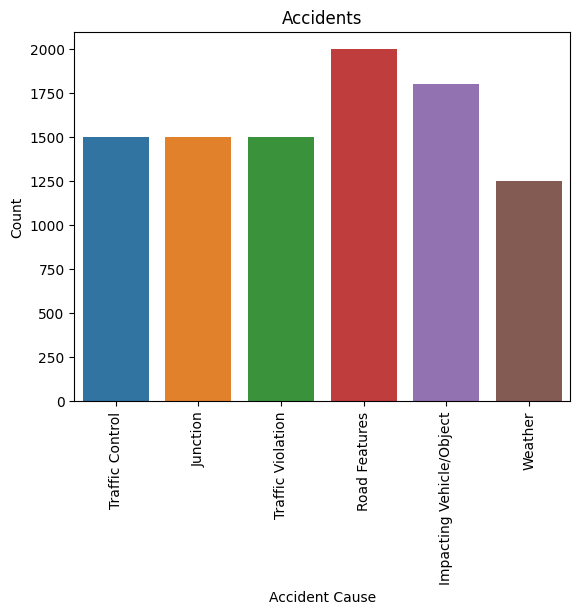

In [20]:

sns.countplot(data=data,x='Cause category')
plt.xticks(rotation=90)
plt.xlabel('Accident Cause')
plt.ylabel('Count')
plt.title('Accidents')
plt.show()

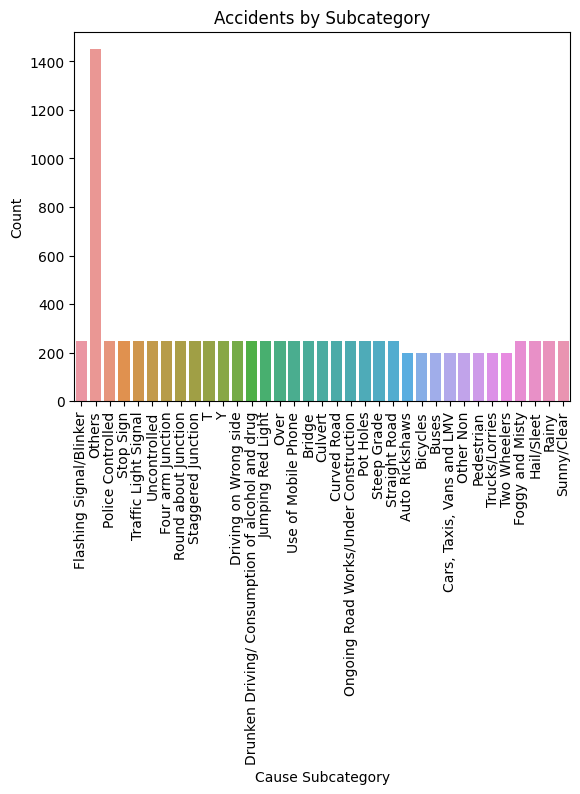

In [21]:
sns.countplot(data=data,x='Cause Subcategory')
plt.xticks(rotation=90)
plt.xlabel('Cause Subcategory')
plt.ylabel('Count')
plt.title('Accidents by Subcategory')
plt.show()

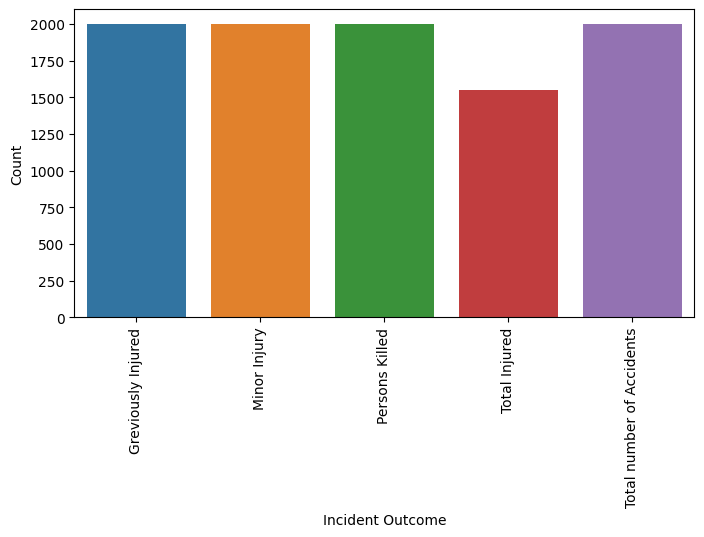

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x=data['Outcome of Incident'])
plt.xticks(rotation=90)
plt.xlabel('Incident Outcome')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Count', ylabel='Count'>

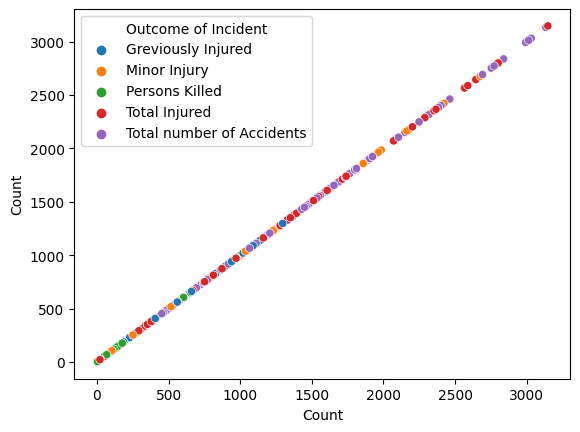

In [23]:
sns.scatterplot(data=data,x='Count', y='Count', hue='Outcome of Incident')

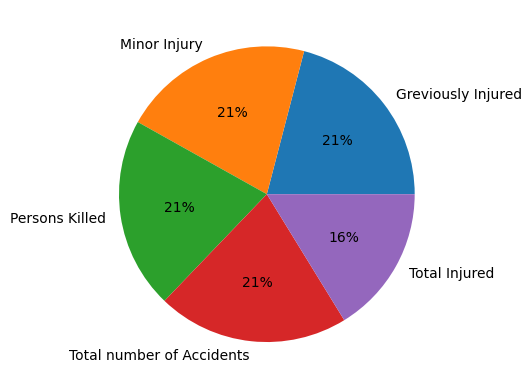

In [30]:
outcome_counts = data['Outcome of Incident'].value_counts()
plt.pie(x=outcome_counts, labels=outcome_counts.index, autopct='%.0f%%')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Greviously Injured'),
  Text(1, 0, 'Minor Injury'),
  Text(2, 0, 'Persons Killed'),
  Text(3, 0, 'Total Injured'),
  Text(4, 0, 'Total number of Accidents')])

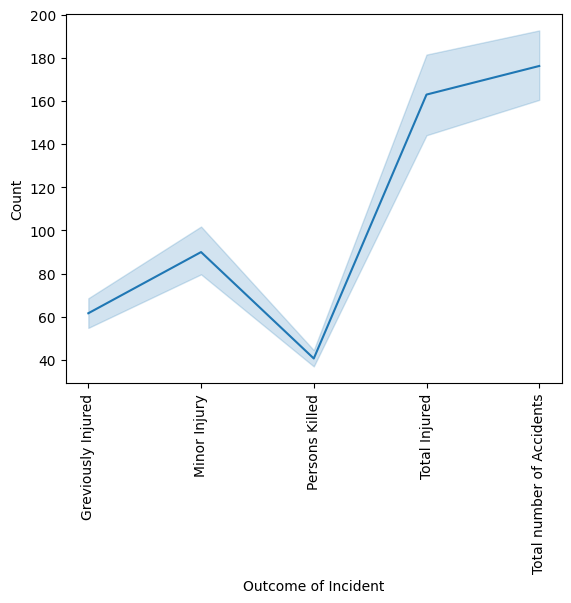

In [32]:
sns.lineplot(data= data,x=data['Outcome of Incident'],y= data['Count'])
plt.xticks(rotation=90)
